In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [136]:
d1  = pd.read_csv('../data/D1.csv', low_memory=False)

In [137]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50031 entries, 0 to 50030
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              50031 non-null  int64 
 1   patient_nbr               50031 non-null  int64 
 2   race                      50031 non-null  object
 3   gender                    50031 non-null  object
 4   age                       50031 non-null  object
 5   weight                    50031 non-null  object
 6   admission_type_id         50031 non-null  int64 
 7   discharge_disposition_id  50031 non-null  int64 
 8   admission_source_id       50031 non-null  int64 
 9   length_of_stay            50031 non-null  int64 
 10  payer_code                50031 non-null  object
 11  medical_specialty         50031 non-null  object
 12  num_lab_procedures        50031 non-null  int64 
 13  num_procedures            50031 non-null  int64 
 14  num_medications       

In [138]:
d1.gender.value_counts(dropna=False)

gender
Female             27000
Male               23030
Unknown/Invalid        1
Name: count, dtype: int64

In [139]:
d1.age.value_counts(dropna=False)

age
[70-80)     13109
[60-70)     10874
[50-60)      8775
[80-90)      7530
[40-50)      5064
[30-40)      2053
[90-100)     1178
[20-30)       842
[10-20)       468
[0-10)        138
Name: count, dtype: int64

In [140]:
d1_copy = d1.copy(deep=True)

### Task 1 - Data Cleaning

Categorise the age variable as a ordinal variable

In [173]:
age_categories = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']

In [174]:
d1_copy['age'] = pd.Categorical(d1_copy['age'], categories=age_categories, ordered=True)

In [182]:
d1_copy['age'].value_counts(dropna=False).sort_index()

age
[0-10)        138
[10-20)       468
[20-30)       842
[30-40)      2053
[40-50)      5064
[50-60)      8775
[60-70)     10874
[70-80)     13109
[80-90)      7530
[90-100)     1178
Name: count, dtype: int64

In [183]:
weight_categories = ['?', '[0-25)', '[25-50)', '[50-75)', '[75-100)', '[100-125)', '[125-150)', '[150-175)', '[175-200)', '>200']

In [184]:
d1_copy['weight'] = pd.Categorical(d1_copy['weight'], categories=weight_categories, ordered=True)

In [185]:
d1_copy['weight'].value_counts(dropna=False).sort_index()

weight
?                0
[0-25)          37
[25-50)         68
[50-75)        550
[75-100)       794
[100-125)      316
[125-150)       73
[150-175)       17
[175-200)        6
>200             1
NaN          48169
Name: count, dtype: int64

In [150]:
d1.number_emergency.value_counts(dropna=False)

number_emergency
0     46185
1      2629
2       644
3       232
4       132
?        69
5        45
6        27
7        24
8        16
9        10
10        8
11        3
22        2
25        1
13        1
42        1
16        1
28        1
Name: count, dtype: int64

Make a copy of the original dataframe to correct the mismatched variables

Fix up the mismatched data

In [151]:
d1_copy['number_outpatient'] = d1_copy['number_outpatient'].replace('?', np.nan).astype('Int64')
d1_copy['number_emergency'] = d1_copy['number_emergency'].replace('?', np.nan).astype('Int64')
d1_copy['number_inpatient'] = d1_copy['number_emergency'].replace('?', np.nan).astype('Int64')


In [152]:
d1_copy[['number_outpatient', 'number_emergency', 'number_inpatient']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50031 entries, 0 to 50030
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   number_outpatient  50011 non-null  Int64
 1   number_emergency   49962 non-null  Int64
 2   number_inpatient   49962 non-null  Int64
dtypes: Int64(3)
memory usage: 1.3 MB


In [179]:
import seaborn as sns

### Task 2 - EDA

<Axes: xlabel='weight', ylabel='Count'>

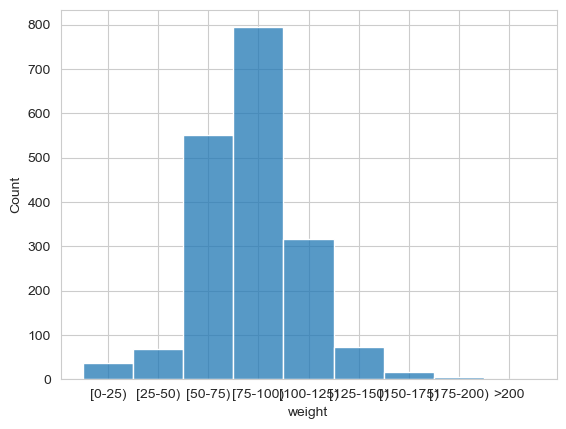

In [180]:
sns.histplot(d1_copy['weight'], bins=6)

In [166]:
# how can I change the order of the weight values




<Axes: xlabel='age', ylabel='Count'>

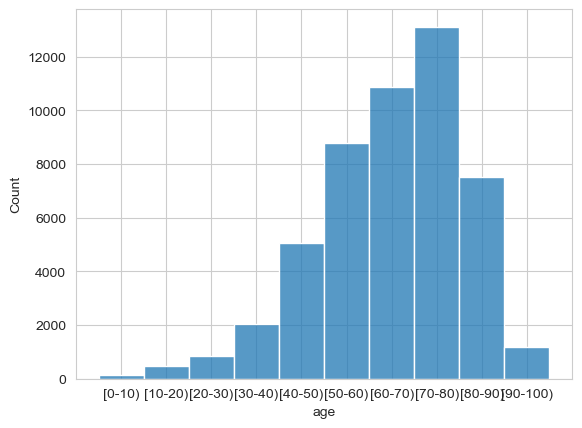

In [181]:
sns.histplot(d1_copy['age'], bins=6)

<Axes: xlabel='payer_code', ylabel='Count'>

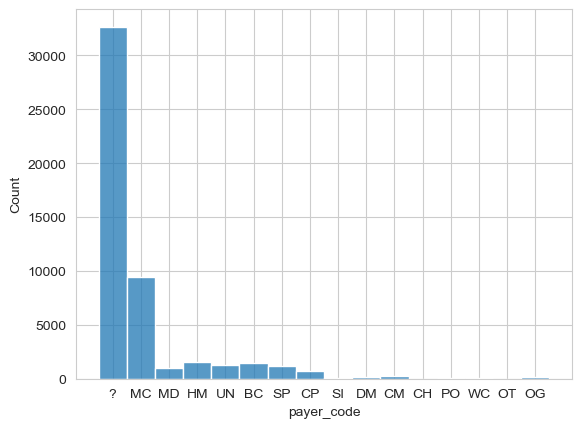

In [171]:
sns.histplot(d1_copy['payer_code'], bins=6)